# SAXSの解析用コード　v1.0

In [1]:
import matplotlib.pyplot as plt
import dataclass as dc
import methods as mt
import file_import as fi
import os

### (1) データの指定
解析用フォルダを設定してください。

解析用フォルダには、ログシート（excel）、透過率のデータ（txt）、散乱データ（chi）ファイルを入れ、準備して下さい。winなら'/'を'¥'に変えてください。

以下のコードを実行し、インプットボックスに指定されたものを入力してください。


In [ ]:
Folder=input('フォルダのパスを入力してください。')
LogS=Folder+'/'+input('ログシートのファイル名を入力してください。拡張子は必要ないです。')+'.xlsx'
IC=Folder+'/'+input('透過率データのファイル名を入力してください。拡張子は必要ないです。')+'.txt'

### (2) 透過率補正および溶媒減算
透過率補正、溶媒減算の実行。winなら'/'を'¥'に変えてください。以下のコードを実行してください。結果はフォルダー内の（analysed）というフォルダーに格納されます。

In [ ]:
def save(newFolder):
    os.mkdir(newFolder)
    mt.trans_cor(LogS, IC, Dpath=Folder+'/', Spath=newFolder+'/')

try:
    save(Folder+'/analyzed')
    print('解析終了。絶対散乱強度補正には、以下のコードを利用してください。')
except FileExistsError:
    try:
        w=input('"analyzed○○"というフォルダーが存在します。保存を実行するために、何か文字や数字を入力してください。"analyzed○○"という名前で保存されます。')
        save(Folder+'/analyzed'+w)
        print('解析終了。絶対散乱強度補正には、以下のコードを利用してください。')
    except FileExistsError:
        print('そのファイルは既に存在します。もう一度実行し直してください。')


### (3) 絶対散乱強度補正定数の算出

（注意！）一番上のモジュールのインストールは実行してください。

In [2]:
dataFolder=input('データファイルの絶対パスを入力してください。')
water=input('水のデータファイル名（.csv）を入力してください。拡張子は必要ないです。')
capi=input('capiのデータファイル名（.csv）を入力してください。拡張子は必要ないです。')
capiname=input('capiの名前を決めてください。')
waterpath, capipath=dataFolder+'/'+water+'.csv', dataFolder+'/'+capi+'.csv'

dfwater, dfcapi=fi.read_I_t(waterpath), fi.read_I_t(capipath)
Water, Capi=dc.SAXSdata(dfwater), dc.SAXSdata(dfcapi)

データをプロットし、平坦領域を決定する。

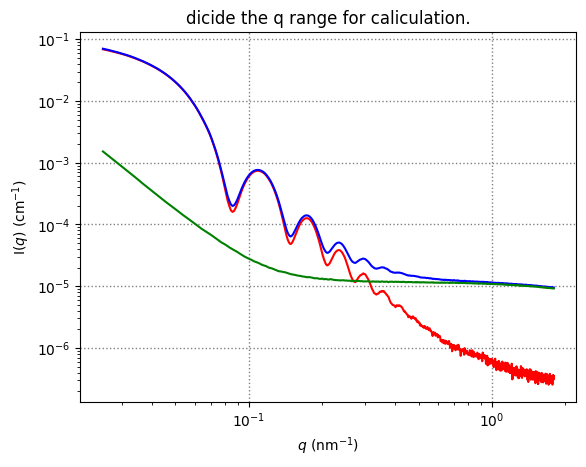

In [3]:
plt.plot(Water.q, Water.I-Capi.I, color='r', label='water-capi')
Water.profile(color='b', label='water')
Capi.profile(color='g', label='capi')
plt.title('dicide the q range for caliculation.')
plt.show()

capi(ssss)の補正定数は、3.180117924773651e-05です。画像の保存は、コードしていません。


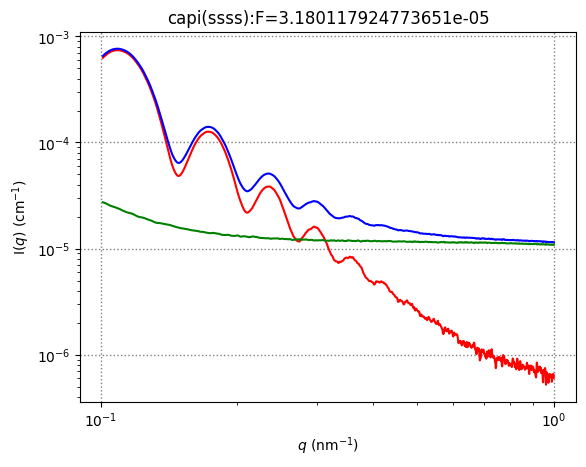

In [4]:
minq=float(input('最小値を入力してください。'))
maxq=float(input('最大値を入力してください。'))
range='@minq < q < @maxq'

newWater, newCapi=dc.SAXSdata(Water.df.query(range)), dc.SAXSdata(Capi.df.query(range))

F=sum(newWater.I-newCapi.I)/len(newWater.q)

plt.plot(newWater.q, newWater.I-newCapi.I, color='r')
newWater.profile(color='b')
newCapi.profile(color='g')
plt.title('capi({}):F={}'.format(capiname, F))


print('capi({})の補正定数は、{}です。画像の保存は、コードしていません。アウトプットは各自お願いします。'.format(capiname, F))

## 追加事項
データをプロットしたい時